In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def clean_df(path): 
    """Clean the dataframe so that it has proper column titles."""
    path_df = pd.read_csv(path)
    # duplicate the first row
    path_df.loc[-1] = path_df.columns.tolist()
    path_df.index = path_df.index + 1
    path_df = path_df.sort_index()
    # rename columns
    df_result = path_df.rename(columns={f"{path_df.columns[0]}": "info", f"{path_df.columns[1]}": "info_vals", f"{path_df.columns[2]}": "info_units", f"{path_df.columns[3]}": "time", f"{path_df.columns[4]}": "values"})
    return df_result

def plot_df(signal_df, t_col, v_col): 
    """Plot the dataframe with values over time to visualize the data."""
    figure, axes = plt.subplots(figsize=(20, 5))
    # cast columns to float
    t = signal_df[t_col].astype("float")
    v = signal_df[v_col].astype("float")
    # plot signal
    axes.plot(t, v, linestyle='-', linewidth=0.1)
    plt.show()

In [13]:
def create_full_df(): 
    """Create a large pandas DataFrame with "time" and "values" columns 
    order: set2_cav1, set2_cav2, set3_cav1, set3_cav2, etc. 
    column names: time_set2_cav1 and values_set2_cav1, etc.
    
    Algorithm: 
    rename the time and values columns for set2_cav1 (time_set2_cav1 and values_set2_cav1) 
    remove the other columns from set2_cav1
    for the rest of the files: 
    - rename their time and values columns following the naming convention 
    - remove their non-time and non-values columns
    - add those columns to the aggregate DataFrame
    return the resulting DataFrame
    """
    
    df_set2_cav1 = clean_df("/Users/jonathontordilla/Desktop/hombom24/scope-analysis/2024-07-03_fast_scope/set2_cav1.csv")
    rename_df_set2_cav1 = df_set2_cav1.rename(columns={"time": "time_set2_cav1", "values": "values_set2_cav1"})
    clean_df_set2_cav1 = rename_df_set2_cav1.loc[0:len(rename_df_set2_cav1["time_set2_cav1"]), "time_set2_cav1": "values_set2_cav1"]
    
    df_set2_cav2 = clean_df("/Users/jonathontordilla/Desktop/hombom24/scope-analysis/2024-07-03_fast_scope/set2_cav2.csv")
    rename_df_set2_cav2 = df_set2_cav2.rename(columns={"time": "time_set2_cav2", "values": "values_set2_cav2"})
    clean_df_set2_cav2 = rename_df_set2_cav2.loc[0:len(rename_df_set2_cav2["time_set2_cav2"]), "time_set2_cav2": "values_set2_cav2"]
    
    result_df = pd.concat([clean_df_set2_cav1, clean_df_set2_cav2], axis=1)
    
    for i in range(3, 13): 
        curr_df_cav1 = clean_df(f"/Users/jonathontordilla/Desktop/hombom24/scope-analysis/2024-07-03_fast_scope/set{i}_cav1.csv")
        curr_df_cav2 = clean_df(f"/Users/jonathontordilla/Desktop/hombom24/scope-analysis/2024-07-03_fast_scope/set{i}_cav2.csv")

        rename_cav1 = curr_df_cav1.rename(columns={"time": f"time_set{i}_cav1", "values": f"values_set{i}_cav1"})
        clean_cav1 = rename_cav1.loc[0:len(rename_cav1[f"time_set{i}_cav1"]), f"time_set{i}_cav1": f"values_set{i}_cav1"]
        rename_cav2 = curr_df_cav2.rename(columns={"time": f"time_set{i}_cav2", "values": f"values_set{i}_cav2"})
        clean_cav2 = rename_cav2.loc[0:len(rename_cav2[f"time_set{i}_cav2"]), f"time_set{i}_cav2": f"values_set{i}_cav2"]
        
        result_df[f"time_set{i}_cav1"] = clean_cav1[f"time_set{i}_cav1"]
        result_df[f"values_set{i}_cav1"] = clean_cav1[f"values_set{i}_cav1"]
        result_df[f"time_set{i}_cav2"] = clean_cav2[f"time_set{i}_cav2"]
        result_df[f"values_set{i}_cav2"] = clean_cav2[f"values_set{i}_cav2"]
        
    return result_df
        
full_df = create_full_df() # creates a DataFrame will data for all files in 2024-07-03 folder
# plot_df(full_df, "time_set2_cav1", "values_set2_cav1") # example: visualize signal over time 
full_df.head()

,time_set2_cav1,values_set2_cav1,time_set2_cav2,values_set2_cav2,time_set3_cav1,values_set3_cav1,time_set3_cav2,values_set3_cav2,time_set4_cav1,values_set4_cav1,...,time_set10_cav2,values_set10_cav2,time_set11_cav1,values_set11_cav1,time_set11_cav2,values_set11_cav2,time_set12_cav1,values_set12_cav1,time_set12_cav2,values_set12_cav2
0,-5.10000000e-007,-5.99999984e-004,-5.10000000e-007,0.00000000e+000,-5.10000000e-007,-5.99999984e-004,-5.10000000e-007,0.00000000e+000,-1.02000000e-006,-5.99999984e-004,...,-1.02000000e-006,-1.20000005e-003,-1.02000000e-006,-4.20000013e-003,-1.02000000e-006,6.00000024e-003,-1.02000000e-006,-5.99999984e-004,-1.02000000e-006,2.40000010e-003
1,-0.000001,-0.0006,-0.000001,0.0,-0.000001,0.0006,-0.000001,0.0,-0.000001,-0.0018,...,-0.000001,0.0012,-0.000001,-0.003,-0.000001,0.0024,-0.000001,-0.0006,-0.000001,0.0024
2,-0.000001,0.0006,-0.000001,0.0,-0.000001,0.0006,-0.000001,0.0012,-0.000001,-0.0006,...,-0.000001,0.0,-0.000001,0.0006,-0.000001,-0.0024,-0.000001,-0.0006,-0.000001,0.0024
3,-0.000001,0.0018,-0.000001,0.0,-0.000001,0.0006,-0.000001,0.0012,-0.000001,-0.0006,...,-0.000001,0.0,-0.000001,-0.0006,-0.000001,-0.0024,-0.000001,-0.0018,-0.000001,0.0012
4,-0.000001,0.0006,-0.000001,0.0,-0.000001,-0.0006,-0.000001,0.0012,-0.000001,0.0006,...,-0.000001,0.0012,-0.000001,-0.0006,-0.000001,-0.0012,-0.000001,-0.0018,-0.000001,0.0012


In [14]:
def avg_powers(df): 
    """Calculate the average power of the amplitude values in the dataframe."""
    result = {}
    for i in range(2, 13): 
        result[f"set{i}_cav1"] = float(np.mean(np.abs(df[f"values_set{i}_cav1"].astype(float))**2))
        result[f"set{i}_cav2"] = float(np.mean(np.abs(df[f"values_set{i}_cav2"].astype(float))**2))
    return result

avg_powers(full_df)

{'set2_cav1': 0.00031105511589383275,
 'set2_cav2': 8.215710412450717e-05,
 'set3_cav1': 0.00034275706400127846,
 'set3_cav2': 9.144357844140782e-05,
 'set4_cav1': 0.00031024070943219396,
 'set4_cav2': 7.835423662705885e-05,
 'set5_cav1': 0.00033779453559953254,
 'set5_cav2': 8.195510090724972e-05,
 'set6_cav1': 0.00035202617193547326,
 'set6_cav2': 8.309601298123789e-05,
 'set7_cav1': 0.0003798454765272642,
 'set7_cav2': 9.01048391357339e-05,
 'set8_cav1': 0.000312647122412892,
 'set8_cav2': 7.545969238913917e-05,
 'set9_cav1': 0.00031166077993936066,
 'set9_cav2': 7.469997711090973e-05,
 'set10_cav1': 0.0003166324091165718,
 'set10_cav2': 7.718432293780235e-05,
 'set11_cav1': 0.0003360134282732092,
 'set11_cav2': 7.896782064806508e-05,
 'set12_cav1': 0.0003431830736395993,
 'set12_cav2': 8.185438730694875e-05}

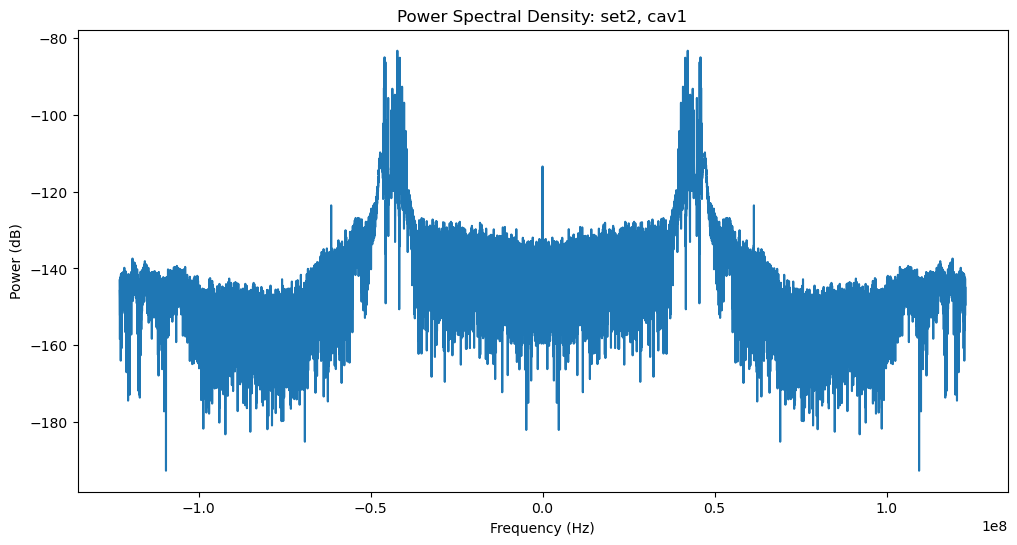

,freq,psd_shift
0,-1.228800e+08,-158.185136
1,-1.228751e+08,-142.850865
2,-1.228702e+08,-149.619595
3,-1.228653e+08,-148.068603
4,-1.228603e+08,-144.800567
...,...,...
49995,1.228554e+08,-145.559799
49996,1.228603e+08,-144.800567
49997,1.228653e+08,-148.068603
49998,1.228702e+08,-149.619595


In [15]:
def plot_psd(df, column): 
    """Calculate and plot the power spectrum of the amplitude values in the dataframe."""
    x = df[column].astype("float")
    fs = 245.76e6 # TODO: is this the correct sampling frequency?
    n = 50000
    psd = np.abs(np.fft.fft(x))**2 / (n*fs)
    psd_log = 10.0*np.log10(psd)
    psd_shifted = np.fft.fftshift(psd_log)
    center_freq = 0
    f = np.arange(fs/-2.0, fs/2.0, fs/n) # start, stop, step centered around 0 Hz
    f += center_freq # now add center frequency
    
    # plot the spectra 
    fig, ax = plt.subplots(figsize = (12, 6))
    set_label = ", ".join(column.split("_")[1:])
    ax.set_title(f"Power Spectral Density: {set_label}")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power (dB)")
    ax.plot(f, psd_shifted)
    plt.show()
    # return the DataFrame of frequencies
    df_freq = pd.DataFrame(data={"freq": f, "psd_shift": psd_shifted})
    return df_freq

plot_psd(full_df, "values_set2_cav1")